In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import itertools
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv('./Data/clean_data.csv')
data.drop(data.columns[[0]],axis=1,inplace=True)

In [3]:
def Range(a):
    return a.max()-a.min();

In [4]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap='YlOrRd'):
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(20,10),)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

In [5]:
range_sample=data.groupby(['Activity','Subject','Sample_Num']).apply(Range).add_prefix('range_')
stdev_sample=data.groupby(['Activity','Subject','Sample_Num']).std().add_prefix('std_')
mean_sample=data.groupby(['Activity','Subject','Sample_Num']).mean().add_prefix('mean_')

In [6]:
total_data=pd.concat([stdev_sample,mean_sample,range_sample],axis=1)
total_data.reset_index(inplace=True)
total_data['Class']=total_data.Activity.replace({'sitting':'Light','standing':'Light','lying':'Light','walking':'Moderate','climbingup':'Moderate','climbingdown':'Moderate','jumping':'Vigorous','running':'Vigorous'})

In [7]:
columns=[
       'std_attr_x_gyro', 'std_attr_y_gyro', 'std_attr_z_gyro',
         'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
         'mean_attr_x_gyro', 'mean_attr_y_gyro', 'mean_attr_z_gyro', 
         'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc',
         'range_attr_x_gyro', 'range_attr_y_gyro','range_attr_z_gyro', 
         'range_attr_x_acc', 'range_attr_y_acc', 'range_attr_z_acc']

In [8]:
temp=total_data.Subject>=5
X_final=total_data[columns][temp]
Y_final=total_data.Class[temp]

In [9]:
# Loading previously saved SVM model

In [10]:
pkl="./Data/SVM_Model.pkl"
classifier=pickle.load(open(pkl,'rb'))

In [11]:
# Making predictions for last two unseen subjects

Testing F1 score is: 0.940
Testing accuracy is: 0.961
              precision    recall  f1-score   support

       Light       1.00      1.00      1.00      1905
    Moderate       0.91      1.00      0.95      1608
    Vigorous       1.00      0.77      0.87       699

    accuracy                           0.96      4212
   macro avg       0.97      0.92      0.94      4212
weighted avg       0.96      0.96      0.96      4212



<Figure size 432x288 with 0 Axes>

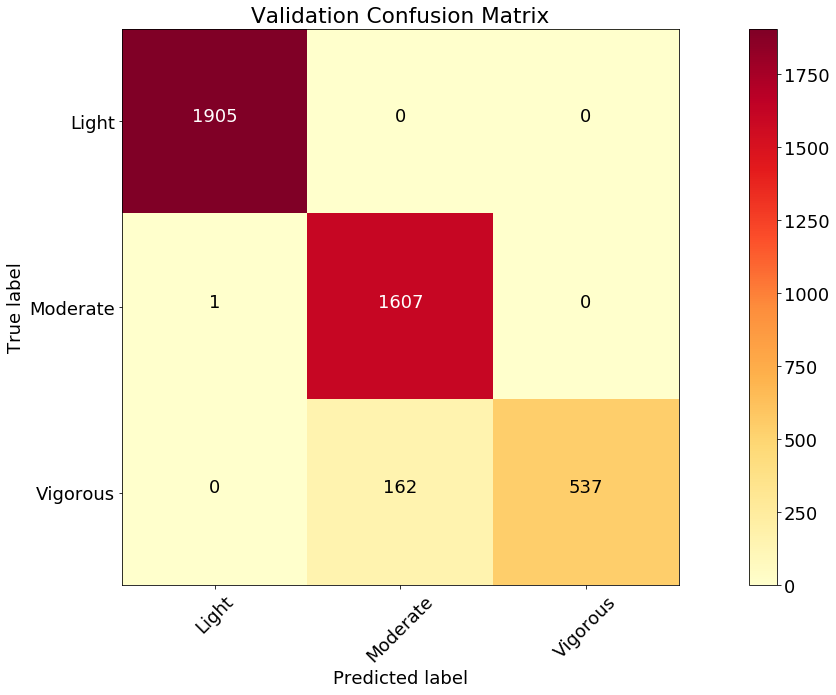

In [12]:
Y_predicted=classifier.predict(X_final)
print(f'Testing F1 score is: {f1_score(Y_final,Y_predicted,average="macro"):.3f}')
print(f'Testing accuracy is: {accuracy_score(Y_final,Y_predicted):.3f}')
print(classification_report(Y_final,Y_predicted))
np.set_printoptions(precision=2)
cm=confusion_matrix(Y_final,Y_predicted)
plt.figure()
plot_confusion_matrix(cm,classes=['Light','Moderate','Vigorous'],title='Validation Confusion Matrix');